In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# FILE_NAME = '../project/mix_abalone_train.csv'
FILE_NAME = '/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/8_ML/project/mix_abalone_train.csv'

In [ ]:
abalone = pd.read_csv(FILE_NAME)
abalone.shape

(94792, 9)

In [ ]:
with open('unique.csv', mode = 'w') as f:

    for i in range(len(abalone.columns)):
        f.write(f'{abalone.columns[i]}, {abalone.iloc[:,i].unique()} \n')

In [ ]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
abalone.corr(numeric_only=True)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.989600,0.911599,0.931092,0.908951,0.912522,0.910372,0.620809
Diameter,0.989600,1.000000,0.915261,0.933384,0.907634,0.913825,0.917211,0.634092
Height,0.911599,0.915261,1.000000,0.898076,0.857288,0.881601,0.899585,0.660468
Whole_weight,0.931092,0.933384,0.898076,1.000000,0.971160,0.973909,0.963767,0.613666
Shucked_weight,0.908951,0.907634,0.857288,0.971160,1.000000,0.948351,0.910346,0.510597
Viscera_weight,0.912522,0.913825,0.881601,0.973909,0.948351,1.000000,0.935596,0.584903
Shell_weight,0.910372,0.917211,0.899585,0.963767,0.910346,0.935596,1.000000,0.691610
Rings,0.620809,0.634092,0.660468,0.613666,0.510597,0.584903,0.691610,1.000000


In [ ]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

모든 변수에 대해 boxplot 다 확인하기

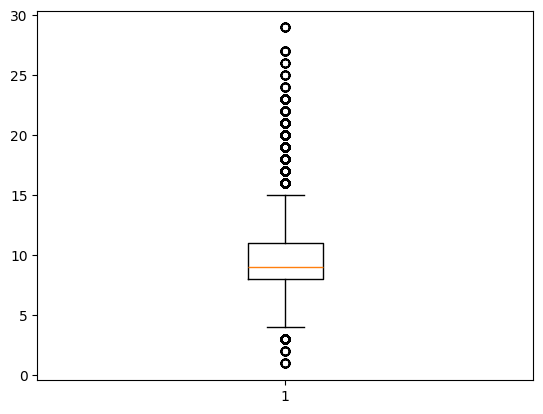

In [ ]:
plt.boxplot(abalone['Rings'])
plt.show()

In [ ]:
abalone['Rings'].describe()

,Rings
count,94792.000000
mean,9.707233
std,3.178704
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


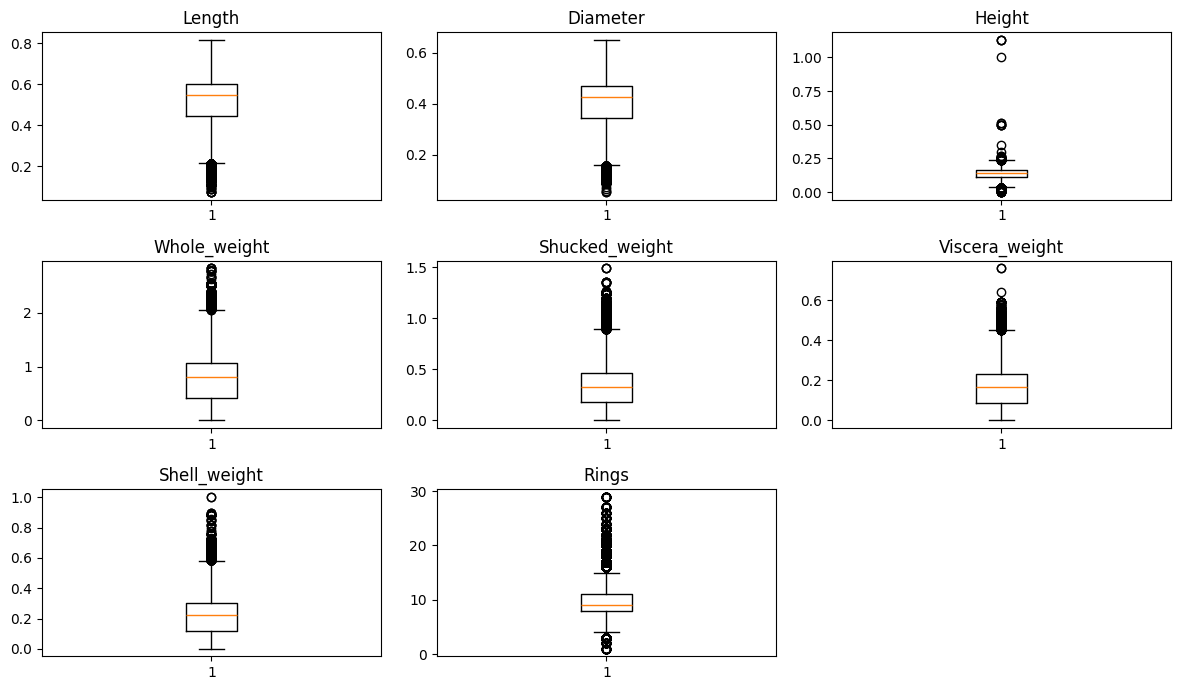

In [ ]:
col = 3
row = len(abalone.columns)// 3

plt.figure(figsize=(12,7))

# 수치형 데이터만 boxplot 그리도록
for i, column_name in enumerate(abalone.select_dtypes(include=np.number).columns,1):
  # 인덱스를 1로 지정
  plt.subplot(col, row, i)
  plt.title(column_name)
  plt.boxplot(abalone[column_name])

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

In [ ]:
abalone = abalone[abalone['Height'] != 0.].copy()
abalone.reset_index(inplace=True, drop=True)
abalone.shape

(94784, 9)

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94784 entries, 0 to 94783
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94784 non-null  object 
 1   Length          94784 non-null  float64
 2   Diameter        94784 non-null  float64
 3   Height          94784 non-null  float64
 4   Whole_weight    94784 non-null  float64
 5   Shucked_weight  94784 non-null  float64
 6   Viscera_weight  94784 non-null  float64
 7   Shell_weight    94784 non-null  float64
 8   Rings           94784 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [ ]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [ ]:
abalone = pd.get_dummies(abalone)

In [ ]:
abalone.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [ ]:
abalone.replace(True, 1, inplace = True)
abalone.replace(False, 0, inplace = True)

In [ ]:
abalone['Rings'] = abalone['Rings'] + 1.5

In [ ]:
abalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,12.5,1,0,0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,12.5,1,0,0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,7.5,0,1,0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,11.5,0,0,1
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,10.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94779,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
94780,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
94781,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
94782,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


각 컬럼 데이터 분포 그래프 확인

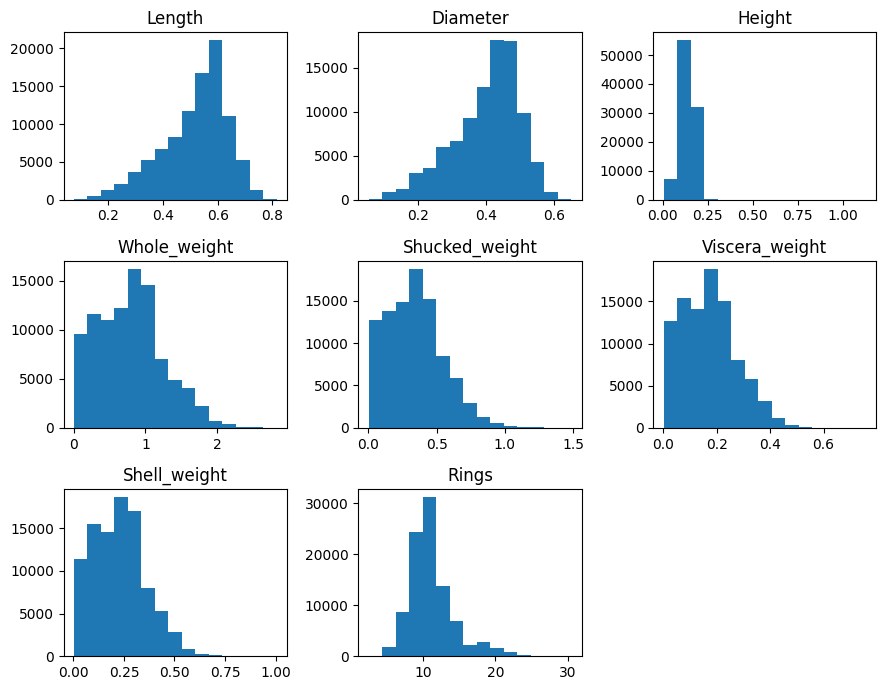

In [ ]:
col = 3
row = len(abalone.loc[:,"Length":"Rings"].columns)//3 + 1

plt.figure(figsize=(9,7))

for i, column_name in enumerate(abalone.loc[:,"Length":"Rings"].columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(abalone[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

In [ ]:
from scipy.stats import boxcox

# Box-Cox 변환
for col in ["Length", "Diameter"]:  # 1D 데이터로 변환해야 함
    abalone[col], _ = boxcox(abalone[col])  # 결과값과 λ 값 반환 (λ는 무시 가능)

# 로그 변환 (범위 내의 모든 컬럼에 적용)
abalone.loc[:, "Height":"Rings"] = np.sqrt(abalone.loc[:, "Height":"Rings"])


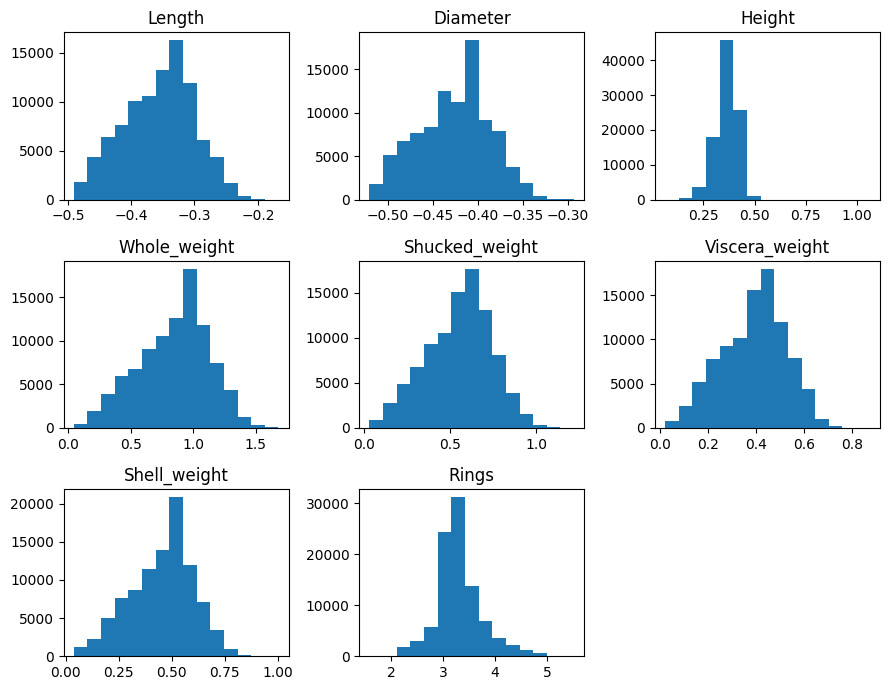

In [ ]:
col = 3
row = len(abalone.loc[:,"Length":"Rings"].columns)//3 + 1

plt.figure(figsize=(9,7))

for i, column_name in enumerate(abalone.loc[:,"Length":"Rings"].columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(abalone[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

In [ ]:
abalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,-0.346397,-0.418419,0.387298,0.878351,0.573149,0.382753,0.489898,3.535534,1,0,0
1,-0.299892,-0.388945,0.380789,1.063015,0.676757,0.525833,0.565685,3.535534,1,0,0
2,-0.481068,-0.514495,0.158114,0.144914,0.074162,0.054772,0.070711,2.738613,0,1,0
3,-0.321036,-0.396643,0.387298,0.956295,0.612781,0.453321,0.500000,3.391165,0,0,1
4,-0.343680,-0.420717,0.360555,0.884308,0.607865,0.400000,0.444410,3.240370,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94779,-0.338171,-0.408986,0.406202,0.941807,0.608276,0.488876,0.498999,3.535534,1,0,0
94780,-0.323955,-0.413752,0.367423,0.982853,0.662571,0.463141,0.510392,3.391165,0,0,1
94781,-0.318091,-0.396643,0.452769,1.084435,0.724914,0.536190,0.554977,3.240370,0,0,1
94782,-0.302989,-0.391535,0.387298,1.046184,0.728697,0.510882,0.544059,3.391165,1,0,0


In [ ]:
feature_df = abalone[['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']].copy()
target_sr = abalone['Rings']

In [ ]:
feature_df

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0,0,-0.346397,-0.418419,0.387298,0.878351,0.573149,0.382753,0.489898
1,1,0,0,-0.299892,-0.388945,0.380789,1.063015,0.676757,0.525833,0.565685
2,0,1,0,-0.481068,-0.514495,0.158114,0.144914,0.074162,0.054772,0.070711
3,0,0,1,-0.321036,-0.396643,0.387298,0.956295,0.612781,0.453321,0.500000
4,0,1,0,-0.343680,-0.420717,0.360555,0.884308,0.607865,0.400000,0.444410
...,...,...,...,...,...,...,...,...,...,...
94779,1,0,0,-0.338171,-0.408986,0.406202,0.941807,0.608276,0.488876,0.498999
94780,0,0,1,-0.323955,-0.413752,0.367423,0.982853,0.662571,0.463141,0.510392
94781,0,0,1,-0.318091,-0.396643,0.452769,1.084435,0.724914,0.536190,0.554977
94782,1,0,0,-0.302989,-0.391535,0.387298,1.046184,0.728697,0.510882,0.544059


In [ ]:
feature_df.describe()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000
mean,0.293320,0.363236,0.343444,-0.356435,-0.426195,0.364276,0.843531,0.553012,0.390141,0.451946
std,0.455286,0.480935,0.474861,0.055718,0.039638,0.054381,0.281571,0.189186,0.133090,0.149046
min,0.000000,0.000000,0.000000,-0.490476,-0.520092,0.063246,0.044721,0.031623,0.022361,0.038730
25%,0.000000,0.000000,0.000000,-0.397620,-0.454105,0.331662,0.647688,0.421307,0.294958,0.346410
50%,0.000000,0.000000,0.000000,-0.349088,-0.420717,0.374166,0.894148,0.574456,0.407431,0.474342
75%,1.000000,1.000000,1.000000,-0.318091,-0.399160,0.400000,1.035616,0.681542,0.482701,0.552268
max,1.000000,1.000000,1.000000,-0.167437,-0.293322,1.063015,1.680922,1.219836,0.871780,1.002497


In [ ]:
target_sr.describe()

,Rings
count,94784.000000
mean,3.316488
std,0.456415
min,1.581139
25%,3.082207
50%,3.240370
75%,3.535534
max,5.522681


## [2] test, train 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df,target_sr, test_size=0.2, random_state=12)

In [ ]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} , y_test : {y_test.shape}')

x_train : (75827, 10), y_train : (75827,)
x_test : (18957, 10) , y_test : (18957,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_v = MinMaxScaler()
scaler_v.fit(x_train)

MinMaxScaler()

In [ ]:
scaler_v.min_, scaler_v.data_min_

(array([ 0.        ,  0.        ,  0.        ,  1.51831957,  2.2934749 ,
        -0.0712591 , -0.02733244, -0.02661372, -0.02632467, -0.04018589]),
 array([ 0.        ,  0.        ,  0.        , -0.49047648, -0.52009242,
         0.07071068,  0.04472136,  0.03162278,  0.02236068,  0.03872983]))

In [ ]:
scaler_v.scale_, scaler_v.data_max_

(array([1.        , 1.        , 1.        , 3.09560115, 4.40974494,
        1.00775579, 0.61117185, 0.84159975, 1.17727514, 1.03759513]),
 array([ 1.        ,  1.        ,  1.        , -0.16743745, -0.29332193,
         1.06301458,  1.68092237,  1.21983605,  0.87177979,  1.00249688]))

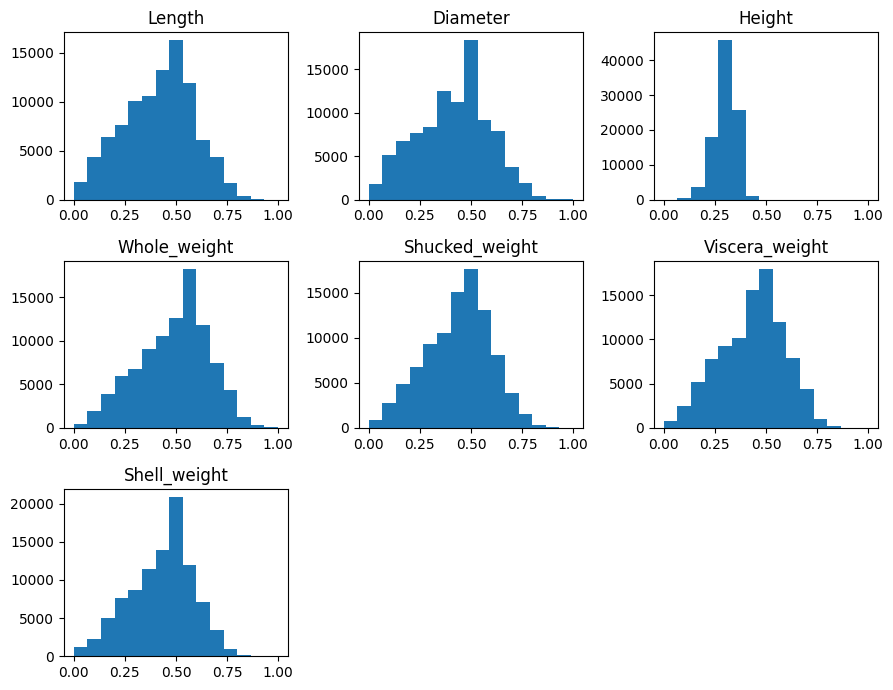

In [ ]:
scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(feature_df)
x_scaled = pd.DataFrame(x_scaled, columns=feature_df.columns)

col = 3
row = len(x_scaled.loc[:,"Length":"Shell_weight"].columns)//3 + 1

plt.figure(figsize=(9,7))

for i, column_name in enumerate(x_scaled.loc[:,"Length":"Shell_weight"].columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(x_scaled[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

(array([2.6000e+01, 3.0000e+01, 1.8600e+03, 2.9770e+03, 5.6690e+03,
        2.4460e+04, 3.1251e+04, 1.3880e+04, 6.9100e+03, 3.6810e+03,
        2.1230e+03, 1.2040e+03, 5.7200e+02, 7.3000e+01, 6.8000e+01]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

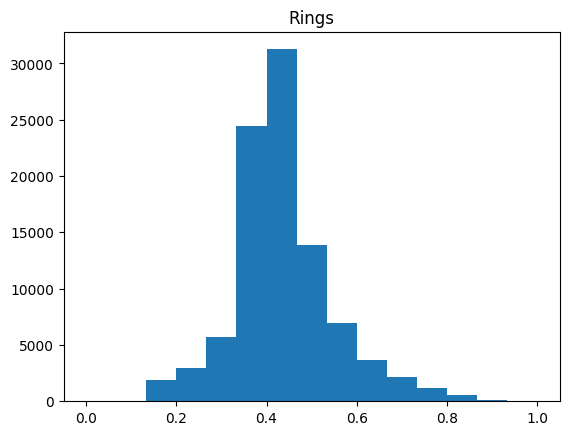

In [ ]:
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(target_sr.values.reshape(-1, 1))

y_scaled = pd.DataFrame(y_scaled)

plt.title("Rings")
plt.hist(y_scaled, bins=15)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_train_scaled.shape

(75827, 10)

In [ ]:
x_train_scaled.min(), x_train_scaled.max()

(Sex_F             0.0
 Sex_I             0.0
 Sex_M             0.0
 Length            0.0
 Diameter          0.0
 Height            0.0
 Whole_weight      0.0
 Shucked_weight    0.0
 Viscera_weight    0.0
 Shell_weight      0.0
 dtype: float64,
 Sex_F             1.0
 Sex_I             1.0
 Sex_M             1.0
 Length            1.0
 Diameter          1.0
 Height            1.0
 Whole_weight      1.0
 Shucked_weight    1.0
 Viscera_weight    1.0
 Shell_weight      1.0
 dtype: float64)

In [ ]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_test_scaled.shape

(18957, 10)

In [ ]:
x_test_scaled.min(), x_test_scaled.max()

(Sex_F             0.000000
 Sex_I             0.000000
 Sex_M             0.000000
 Length            0.016372
 Diameter          0.001615
 Height           -0.007523
 Whole_weight      0.021942
 Shucked_weight    0.000000
 Viscera_weight    0.000000
 Shell_weight      0.003836
 dtype: float64,
 Sex_F             1.000000
 Sex_I             1.000000
 Sex_M             1.000000
 Length            0.962730
 Diameter          0.941381
 Height            0.651942
 Whole_weight      1.000000
 Shucked_weight    0.915452
 Viscera_weight    1.000000
 Shell_weight      0.942521
 dtype: float64)

## [3_2] 앙상블 - Voting

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
k_model = KNeighborsRegressor()
dt_model = DecisionTreeRegressor(random_state= 12)
l_model = LinearRegression()

In [ ]:
v_model = VotingRegressor(estimators=[('KNN', k_model), ('DT',dt_model) ,('LR',l_model)])

In [ ]:
v_model.fit(x_train_scaled, y_train)

VotingRegressor(estimators=[('KNN', KNeighborsRegressor()),
                            ('DT', DecisionTreeRegressor(random_state=12)),
                            ('LR', LinearRegression())])

In [ ]:
train_score = v_model.score(x_train_scaled, y_train)
test_score = v_model.score(x_test_scaled, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 0.8799817732835862, test_score : 0.6491827241595851


## [3-2_1] 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'weights' : [(0.0, 0.0, 1.0), (0.0, 0.1, 0.9), (0.0, 0.2, 0.8), (0.0, 0.3, 0.7), (0.0, 0.4, 0.6), (0.0, 0.5, 0.5),
                       (0.0, 0.6, 0.4), (0.0, 0.7, 0.3), (0.0, 0.8, 0.2), (0.0, 0.9, 0.1), (0.0, 1.0, 0.0), (0.1, 0.0, 0.9),
                       (0.1, 0.1, 0.8), (0.1, 0.2, 0.7), (0.1, 0.3, 0.6), (0.1, 0.4, 0.5), (0.1, 0.5, 0.4), (0.1, 0.6, 0.3),
                       (0.1, 0.7, 0.2), (0.1, 0.8, 0.1), (0.1, 0.9, 0.0), (0.2, 0.0, 0.8), (0.2, 0.1, 0.7), (0.2, 0.2, 0.6),
                       (0.2, 0.3, 0.5), (0.2, 0.4, 0.4), (0.2, 0.5, 0.3), (0.2, 0.6, 0.2), (0.2, 0.7, 0.1), (0.2, 0.8, 0.0),
                       (0.3, 0.0, 0.7), (0.3, 0.1, 0.6), (0.3, 0.2, 0.5), (0.3, 0.3, 0.4), (0.3, 0.4, 0.3), (0.3, 0.5, 0.2),
                       (0.3, 0.6, 0.1), (0.3, 0.7, 0.0), (0.4, 0.0, 0.6), (0.4, 0.1, 0.5), (0.4, 0.2, 0.4), (0.4, 0.3, 0.3),
                       (0.4, 0.4, 0.2), (0.4, 0.5, 0.1), (0.4, 0.6, 0.0), (0.5, 0.0, 0.5), (0.5, 0.1, 0.4), (0.5, 0.2, 0.3),
                       (0.5, 0.3, 0.2), (0.5, 0.4, 0.1), (0.5, 0.5, 0.0), (0.6, 0.0, 0.4), (0.6, 0.1, 0.3), (0.6, 0.2, 0.2),
                       (0.6, 0.3, 0.1), (0.6, 0.4, 0.0), (0.7, 0.0, 0.3), (0.7, 0.1, 0.2), (0.7, 0.2, 0.1), (0.7, 0.3, 0.0),
                       (0.8, 0.0, 0.2), (0.8, 0.1, 0.1), (0.8, 0.2, 0.0), (0.9, 0.0, 0.1), (0.9, 0.1, 0.0), (1.0, 0.0, 0.0)]}

In [ ]:
v_model = VotingRegressor(estimators=[('KNN', k_model), ('DT',dt_model) ,('LR',l_model)])

In [ ]:
search_cv = GridSearchCV(v_model, param_grid=params, scoring='r2',refit=True, cv=5, verbose=4)

In [ ]:
search_cv.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv.best_score_] {search_cv.best_score_}')
print(f'[search_cv.best_param] {search_cv.best_params_}')
print(f'[search_cv.best_estimator_] {search_cv.best_estimator_}')

cv_result_df = pd.DataFrame(search_cv.cv_results_)
cv_result_df

[search_cv.best_score_] 0.6737458432268524
[search_cv.best_param] {'weights': (0.3, 0.1, 0.6)}
[search_cv.best_estimator_] VotingRegressor(estimators=[('KNN', KNeighborsRegressor()),
                            ('DT', DecisionTreeRegressor(random_state=12)),
                            ('LR', LinearRegression())],
                weights=(0.3, 0.1, 0.6))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.967740,0.286358,2.782241,1.449860,"(0.0, 0.0, 1.0)","{'weights': (0.0, 0.0, 1.0)}",0.660525,0.661497,0.645758,0.660401,0.658628,0.657362,0.005875,26
1,1.215806,0.889579,1.955956,0.574761,"(0.0, 0.1, 0.9)","{'weights': (0.0, 0.1, 0.9)}",0.666972,0.668335,0.652264,0.667378,0.665238,0.664037,0.005972,17
2,0.818932,0.181585,1.861640,0.336874,"(0.0, 0.2, 0.8)","{'weights': (0.0, 0.2, 0.8)}",0.665605,0.667433,0.651146,0.666817,0.664042,0.663008,0.006043,19
3,0.836023,0.137515,1.819476,0.424664,"(0.0, 0.3, 0.7)","{'weights': (0.0, 0.3, 0.7)}",0.656423,0.658791,0.642404,0.658719,0.655041,0.654276,0.006103,28
4,0.786178,0.098961,1.917513,0.466828,"(0.0, 0.4, 0.6)","{'weights': (0.0, 0.4, 0.6)}",0.639428,0.642409,0.626039,0.643083,0.638235,0.637839,0.006169,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.782795,0.081020,1.788787,0.609981,"(0.8, 0.1, 0.1)","{'weights': (0.8, 0.1, 0.1)}",0.653046,0.653702,0.647986,0.653764,0.652617,0.652223,0.002161,31
62,0.813021,0.166529,1.752099,0.380371,"(0.8, 0.2, 0.0)","{'weights': (0.8, 0.2, 0.0)}",0.643713,0.645756,0.640087,0.646185,0.644736,0.644096,0.002179,34
63,0.803411,0.129472,1.817246,0.300661,"(0.9, 0.0, 0.1)","{'weights': (0.9, 0.0, 0.1)}",0.644931,0.644418,0.640463,0.644657,0.643400,0.643574,0.001639,35
64,0.810588,0.158876,1.809133,0.351814,"(0.9, 0.1, 0.0)","{'weights': (0.9, 0.1, 0.0)}",0.642416,0.643331,0.639341,0.643738,0.642489,0.642263,0.001545,36


In [ ]:
search_cv.best_estimator_.score(x_test_scaled,y_test )

0.673767819094875

In [ ]:
best_train_score = search_cv.best_estimator_.score(x_train_scaled, y_train)
best_test_score = search_cv.best_estimator_.score(x_test_scaled, y_test)

print(f'best_train_score : {best_train_score}, best_test_score : {best_test_score}')

best_train_score : 0.7663493741089522, best_test_score : 0.673767819094875


In [ ]:
search_cv_1 = GridSearchCV(v_model, param_grid=params, scoring='r2',refit=True, cv=10, verbose=4)

In [ ]:
search_cv_1.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_1.best_score_] {search_cv_1.best_score_}')
print(f'[search_cv_1.best_param] {search_cv_1.best_params_}')
print(f'[search_cv_1.best_estimator_] {search_cv_1.best_estimator_}')

cv_result_df1 = pd.DataFrame(search_cv_1.cv_results_)
cv_result_df1

[search_cv_1.best_score_] 0.673496420518482
[search_cv_1.best_param] {'weights': (0.3, 0.1, 0.6)}
[search_cv_1.best_estimator_] VotingRegressor(estimators=[('KNN', KNeighborsRegressor()),
                            ('DT', DecisionTreeRegressor(random_state=12)),
                            ('LR', LinearRegression())],
                weights=(0.3, 0.1, 0.6))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.145393,0.424885,1.551023,0.730445,"(0.0, 0.0, 1.0)","{'weights': (0.0, 0.0, 1.0)}",0.665381,0.655584,0.667128,0.655507,0.644040,0.647253,0.654620,0.666074,0.665582,0.651830,0.657300,0.007921,25
1,1.202473,0.533590,1.357896,0.552206,"(0.0, 0.1, 0.9)","{'weights': (0.0, 0.1, 0.9)}",0.671386,0.662457,0.672713,0.660633,0.651233,0.654480,0.662017,0.672123,0.670511,0.658849,0.663640,0.007317,17
2,0.911422,0.150486,1.010666,0.206211,"(0.0, 0.2, 0.8)","{'weights': (0.0, 0.2, 0.8)}",0.669989,0.661386,0.670460,0.657518,0.650769,0.654179,0.661714,0.670340,0.667623,0.658213,0.662219,0.006770,19
3,0.928796,0.155893,1.190875,0.290809,"(0.0, 0.3, 0.7)","{'weights': (0.0, 0.3, 0.7)}",0.661189,0.652371,0.660369,0.646164,0.642647,0.646351,0.653712,0.660724,0.656918,0.649922,0.653037,0.006363,28
4,0.910524,0.132350,1.090002,0.236174,"(0.0, 0.4, 0.6)","{'weights': (0.0, 0.4, 0.6)}",0.644987,0.635413,0.642440,0.626568,0.626868,0.630996,0.638010,0.643274,0.638396,0.633976,0.636093,0.006218,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.959924,0.161363,1.168632,0.277695,"(0.8, 0.1, 0.1)","{'weights': (0.8, 0.1, 0.1)}",0.653028,0.652909,0.655131,0.652252,0.645820,0.648274,0.652001,0.655921,0.660767,0.643226,0.651933,0.004827,31
62,0.885580,0.119865,1.108410,0.209387,"(0.8, 0.2, 0.0)","{'weights': (0.8, 0.2, 0.0)}",0.643831,0.644178,0.645616,0.642349,0.637911,0.641689,0.644246,0.646716,0.651153,0.634967,0.643266,0.004273,35
63,0.962313,0.178814,1.163816,0.248462,"(0.9, 0.0, 0.1)","{'weights': (0.9, 0.0, 0.1)}",0.644850,0.644252,0.646971,0.645313,0.637929,0.639054,0.643473,0.647783,0.653447,0.634259,0.643733,0.005203,34
64,0.916725,0.151934,1.123864,0.270580,"(0.9, 0.1, 0.0)","{'weights': (0.9, 0.1, 0.0)}",0.642081,0.642508,0.644386,0.642802,0.636747,0.639210,0.642486,0.645482,0.650809,0.632703,0.641922,0.004673,36


In [ ]:
search_cv_1.best_estimator_.score(x_test_scaled,y_test )

0.673767819094875

In [ ]:
best_train_score = search_cv_1.best_estimator_.score(x_train_scaled, y_train)
best_test_score = search_cv_1.best_estimator_.score(x_test_scaled, y_test)

print(f'best_train_score : {best_train_score}, best_test_score : {best_test_score}')

best_train_score : 0.7663493741089522, best_test_score : 0.673767819094875
